# What is Text Analytics
It is all about deriving **high-quality structured data** for 
analysis from **unstructured text**. 
 
It is used to measure 
- customer opinions, 
- product reviews, 
- feedback, to provide search facility, 
- sentimental analysis and 
- entity modeling to support data-backed decision 
making.


## What type of information can be extracted?
* **Terms**  

These are extraction based on keywords (on own site or competitor site).  
> E.g.  
> **Input**: Elon Musk has shared a photo of the spacesuit designed by SpaceX. This is the second image shared of the new design and the first to feature the spacesuit’s full-body look.  
> **Output**: elon musk, new design, photo, spacex  
>  
>> Read more [here](https://monkeylearn.com/keyword-extraction/).


* **Named Entity**  

These are extracted to answer the ‘who’, ‘what’, or ‘where’. Some instances include name, location, timestamp, or product.  
> E.g.  
> **Input**: Jim bought 300 shares of Acme Corp. in 2006.  
> **Output**: Jim {*person*} bought 300 shares of Acme Corp. {*Organization*} in 2006 {*time*}.
>  
>> Read more [here](https://monkeylearn.com/blog/named-entity-recognition/).

* **Concept/Topic**  

These are extracted to answer the ‘about’ of a piece of content. It describes the idea behind the content.  
> E.g.  
> **Input**: The nice thing about Eventbrite is that it's **free** to use as long as you're not **charging** for the event. There is a **fee** if you are **charging** for the event –  **2.5% plus a $0.99 transaction fee**..  
> **Output**: Pricing
>  
>> Read more [here](https://monkeylearn.com/blog/introduction-to-topic-modeling/).

* **Sentiment**  

These are extracted to gauge the overall feeling around a brand at the moment. 
> E.g.  
> **Input**: We had the most iconic view of the Manhattan skyline in every room.  
> **Output**: Positive
>  
>> Read more [here](https://monkeylearn.com/blog/text-mining-sentiment-analysis/#:~:text=with%20Text%20Mining-,What%20Is%20Text%20Mining%20with%20Sentiment%20Analysis%3F,%2C%20neutral%2C%20and%20beyond).


## The Process
1. Choose resources *(DB, files, folders)*
2. Extract text
3. Clean text *(remove stop words, tokenize)*
4. Analysis *(NLP, topics, keywords, sentiment)*
5. Clustering
6. Results

# What tools/algorithms can I use?
* Decision tree
* Naive-Bayes
* Support Vector Machine (SVM)
* K-nearest neighbours
* Artificial Neural Networks (ANN)
* Fuzzy C-Means
* LDA
* NMF


####In this Text Mining session, we will be focussing on Topic Extraction/ Topic Modelling Tasks and associated algorithms.
Out of all the existing algorithms for topic modeling, Latent Dirichlet Allocation (LDA) and Non-negative matrix factorization (NMF) are extensively used by Data modelers and widely accepted in scientific community for topic extraction. LDA is a probabilistic model and NMF is a matrix factorization and multivariate analysis technique

## Latent Dirichlet Allocation (LDA)
It helps in finding a linear combination of features that distinguishes or characterizes  multiple classes of events or objects.

**Primary steps in LDA**
1. Provide an estimate of the potential number of topics
2. Algorithm assigns a word to a topic
3. Algorithm will check the accuracy of topic assignment in a loop

**Example**  
Suppose there are three separate sentences.
1. I eat chicken and vegetables
2. Chicken are pets
3. My dog loves to eat chicken

With LDA, topic clustering for these 3 lines are done as follows –
* Sentence 1 = 100% *Topic B*
* Sentence 2 = 100% *Topic A*
* Sentence 3= 33% *Topic A* and 67% *Topic B*

Now we infer that there are two clusters for sentence classification –  
**Pets** (*Topic A*) and **Food** (*Topic B*).


In [63]:
import numpy as np
import pandas as pd
from sklearn import decomposition
from scipy import linalg

# Topic Extraction Example with NMF

### Text cleaning using NLTK:
Structure of Data:
* **id**: pulled from Reddit
* **label**: 1 or 0
* **Category**: ?
* **Category old**: ?
* **selftext**: the actual Reddit post that we are gonna analyse
* w.e.
  
We only care for **Category** and **selftext**.

In [64]:
from google.colab import files 
uploaded_files = files.upload() # upload file
import io
data = io.BytesIO(uploaded_files['textMining.csv']) # read file
# load as a data frame
mental_comments = pd.read_csv(data)

Saving textMining.csv to textMining (4).csv


In [65]:
# read textMining.csv in to a dataframe
#mental_comments = pd.read_csv('textMining.csv')

# show the first 5 rows
mental_comments.head()

,id,label,Category,Category old,selftext,Column1,Unnamed: 6,Unnamed: 7
0,13.0,1,Competition,Competition,A stress I always find myself undergoing is th...,NaN,rare,0.0
1,17.0,1,Competition,Competition,I've had it reviewed by a few upper years and ...,NaN,Other,0.0
2,48.0,1,Competition,Interview,Feeling stressed out. My job hunt is not going...,NaN,Working Environment,14.0
3,68.0,1,Competition,Competition,yo i feel you. a bunch of my friends are in sf...,NaN,NaN,NaN
4,301.0,1,Working Environment,Other,This is my last Monday of the co-op term. I st...,NaN,NaN,NaN


In [66]:
# only keep selftext
mental_comments = mental_comments['selftext'].to_frame()

mental_comments.head()


,selftext
0,A stress I always find myself undergoing is th...
1,I've had it reviewed by a few upper years and ...
2,Feeling stressed out. My job hunt is not going...
3,yo i feel you. a bunch of my friends are in sf...
4,This is my last Monday of the co-op term. I st...


In [67]:
import nltk 

# download list of stop words (very commonly repeated words like the, an, in, etc.)
nltk.download('stopwords') # have to run once
stopwords = nltk.corpus.stopwords.words('english')

import re,string

# function that takes a string, 
# turns it into lower case and removes stopwords and punctuation
def clean_text(text):
  # remove stopwords
  text = ' '.join([word for word in text.split() if word not in stopwords])
  # remove punctuation (found at string.punctuation)
  text = ''.join([word for word in text if word not in string.punctuation])
  # turn text into lowercase
  text = text.lower()
  # return the clean text
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
# initialize a letammatizer (to reduce words to their roots)
wn = nltk.WordNetLemmatizer()

nltk.download('wordnet') # have to run once
nltk.download('omw-1.4') # have to run once

# function that takes a string,
# splits it into inidivual words and lemmatizes each one of them,
# return the array as a string to be saved in the dataframe
def lemmatizing(text):
  # split text it into array of inidivual words and lemmatize each one of them
  text = [wn.lemmatize(word) for word in text.split()]
  # return the array as a string
  return str(text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [69]:

# add a 'non_stop' column to the dataframe that stores the clean version of every post
mental_comments['non_stop'] = mental_comments['selftext'].apply(lambda x: clean_text(str(x.strip())))

# add a 'lemm' column to the dataframe that stores the lemmatized words in every post
mental_comments['lemm'] = mental_comments['non_stop'].apply(lambda x: lemmatizing(x))

# show the first 5 rows
mental_comments.head()

,selftext,non_stop,lemm
0,A stress I always find myself undergoing is th...,a stress i always find undergoing i feel scare...,"['a', 'stress', 'i', 'always', 'find', 'underg..."
1,I've had it reviewed by a few upper years and ...,ive reviewed upper years friends class before ...,"['ive', 'reviewed', 'upper', 'year', 'friend',..."
2,Feeling stressed out. My job hunt is not going...,feeling stressed out my job hunt going well la...,"['feeling', 'stressed', 'out', 'my', 'job', 'h..."
3,yo i feel you. a bunch of my friends are in sf...,yo feel you bunch friends sf term i really str...,"['yo', 'feel', 'you', 'bunch', 'friend', 'sf',..."
4,This is my last Monday of the co-op term. I st...,this last monday coop term i started really en...,"['this', 'last', 'monday', 'coop', 'term', 'i'..."


## Creating Term Frequency-Inverse Document Frequency (TF-IDF) Matrix
A statistical measure that evaluates how relevant a word is to a document in a collection of documents.  
$$tf-idf = \frac{frequency\ of\ word\ in\ current\ documents}{document\ frequnecy\ of\ word\ across\ all\ documents}$$

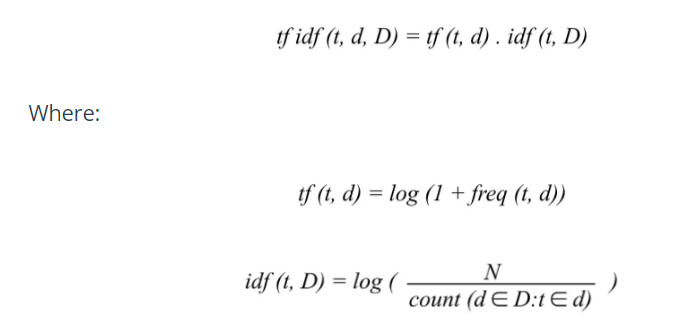

> Read more [here](https://monkeylearn.com/blog/what-is-tf-idf/).

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize a tf-idf vectorizer with english stop words
vectorizer_tfidf = TfidfVectorizer(stop_words='english')

# fit and transform the lemmatized words through the vectorizer
vectors_tfidf = vectorizer_tfidf.fit_transform(mental_comments['lemm'])
vectors_tfidf.shape

(230, 1989)

## Applying topic modeling using Non-Negative Matrix Factorization (NMF)
NMF stands for Latent Semantic Analysis with the ‘Non-negative Matrix-Factorization’ method used to decompose the document-term matrix into two smaller matrices — the document-topic matrix (U) and the topic-term matrix (W) — each populated with unnormalized probabilities.

![NMF](https://miro.medium.com/max/700/1*Cdk8UXkHqkLxfPEFTNEU4A.jpeg)

> Read more [here](https://towardsdatascience.com/nmf-a-visual-explainer-and-python-implementation-7ecdd73491f8).

In [75]:
import collections

n_topics = 6

# initialize a Non-Negative Matrix Factorization (NMF) model
# set random_state=1 to get the same results everytime
# we must also define the number of topics as n_components
clf = decomposition.NMF(n_components=n_topics,random_state=1)

# fit the model using the tf-idf vectors
# get the Weights
W1 = clf.fit_transform(vectors_tfidf)

print('W1 shape (# documents or comments, # topics) is ', W1.shape)

# get the arrays of words that define topics
# get the Hidden Variables
H1 = clf.components_

print('H1 shape (# topics, # terms) is ', H1.shape)
H1


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


W1 shape (# documents or comments, # topics) is  (230, 6)
H1 shape (# topics, # terms) is  (6, 1989)


array([[0.00030962, 0.00030962, 0.        , ..., 0.        , 0.00282155,
        0.00282155],
       [0.        , 0.        , 0.03533045, ..., 0.00847696, 0.00252538,
        0.00252538],
       [0.00050695, 0.00050695, 0.00765551, ..., 0.        , 0.        ,
        0.        ],
       [0.00072372, 0.00072372, 0.02228594, ..., 0.00320521, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00898363, 0.00241121,
        0.00241121],
       [0.00145497, 0.00145497, 0.00061202, ..., 0.        , 0.        ,
        0.        ]])

In [72]:
# get the list of all words (a.k.a. terms) found in the tf-idf vectors
vocab = np.array(vectorizer_tfidf.get_feature_names())

# count the number of comments that belong to each topic (primarily)
# should have a dictionary of key:topic, value: #comments belonging to this topic
topics_frequency = collections.Counter(np.array(W1.argsort()[:,-1]))
topics_frequency


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Counter({4: 21, 2: 38, 3: 46, 0: 62, 5: 24, 1: 39})

In [73]:
n_terms_to_display = 10

print('Top ', n_terms_to_display, ' terms for the top',n_topics, 'topics:')

for topic_i in topics_frequency.keys():
  print('Topic {}:{}'.format(
    topic_i+1,
    ", ".join([str(x) for x in vocab[(-H1[topic_i]).argsort()[:n_terms_to_display]]])
  ))
  

Top  10  terms for the top 6 topics:
Topic 5:job, got, bad, coop, interviewed, stress, feeling, point, sure, like
Topic 3:term, coop, im, week, left, going, bad, fall, super, scared
Topic 4:interview, im, ill, today, resume, midterm, got, week, said, ampx200b
Topic 1:feel, like, really, im, work, ive, people, going, friend, want
Topic 6:program, hey, arbus, know, business, art, let, guy, using, offer
Topic 2:course, learn, winter, heard, website, midterm, took, final, assignment, spring
